In [23]:
from Sensor import Sensor as sensor
from Network import *
from Plotter import *
from Effector import *

# Example

In [24]:
data_collector = sensor()
data_collector.load_data_set('./data/full.csv')
#data_collector.save_data_set(format='%d')
print( len(data_collector.data) )

trainer = preprocessor(data_collector.data, seq_length = 5)
trainer.scale()
trainer.preprocess()

print( trainer.data.shape )
print( trainer.label.shape )
print( trainer.index.shape )

Load FLEMG dataset from ./data/full.csv
3198
(3194, 5, 14)
(3194, 6)
(3194, 5, 1)


In [0]:
data_collector.open_port()
data_collector.receive_data()
print(data_collector.data)

In [25]:
tf.reset_default_graph()

Network = LSTM_Network(trainer)
with Network.graph.as_default():
    Network.construct_placeholders()
    Network.train_network(trainer.data, trainer.label, 2)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


Instructions for updating:
Colocations handled automatically by placer.


[step: 0] loss: 2670.656005859375


In [80]:
tf.reset_default_graph()

Network = LSTM_Network(trainer)
Network.restore_network('model/temp')
print( trainer.data.shape )
print( trainer.label.shape )
print( trainer.index.shape )
prediction = Network.infer()

Network.close()

INFO:tensorflow:Restoring parameters from model/temp/lstm.ckpt


(3194, 5, 14)
(3194, 6)
(3194, 5, 1)


RMSE: 0.23289325833320618


In [85]:
tf.reset_default_graph()

Network = LSTM_Network(trainer)
Network.restore_network('model/_')
prediction = Network.infer()

Network.close()

INFO:tensorflow:Restoring parameters from model/_/rnn.ckpt


RMSE: 0.15342622995376587


In [81]:
infer_target = Preprocessor(data_collector.data[ -5 : ], seq_length = 5)

Network = LSTM_Network(infer_target)
Network.restore_network()
infer_target.scale()
infer_target.preprocess()
print( infer_target.label.shape )
prediction = Network.infer(infer_target)
Network.close()

INFO:tensorflow:Restoring parameters from checkpoints/rnn.ckpt


(1, 6)
RMSE: 13.567753791809082


In [89]:
infer_target = Preprocessor(data_collector.data[ -int((len(data_collector.data) * 0.3)) : ], seq_length = 5)

Network = LSTM_Network(infer_target)
Network.restore_network()
infer_target.scale()
infer_target.preprocess()
print( infer_target.label.shape )
print( infer_target.label[450])
prediction = Network.infer(infer_target)
Network.close()

INFO:tensorflow:Restoring parameters from checkpoints/rnn.ckpt


(955, 6)
[0.38085938 0.41015625 0.41015625 0.38085938 0.41015625 0.41015625]


RMSE: 0.1484842598438263


<Figure size 432x288 with 0 Axes>

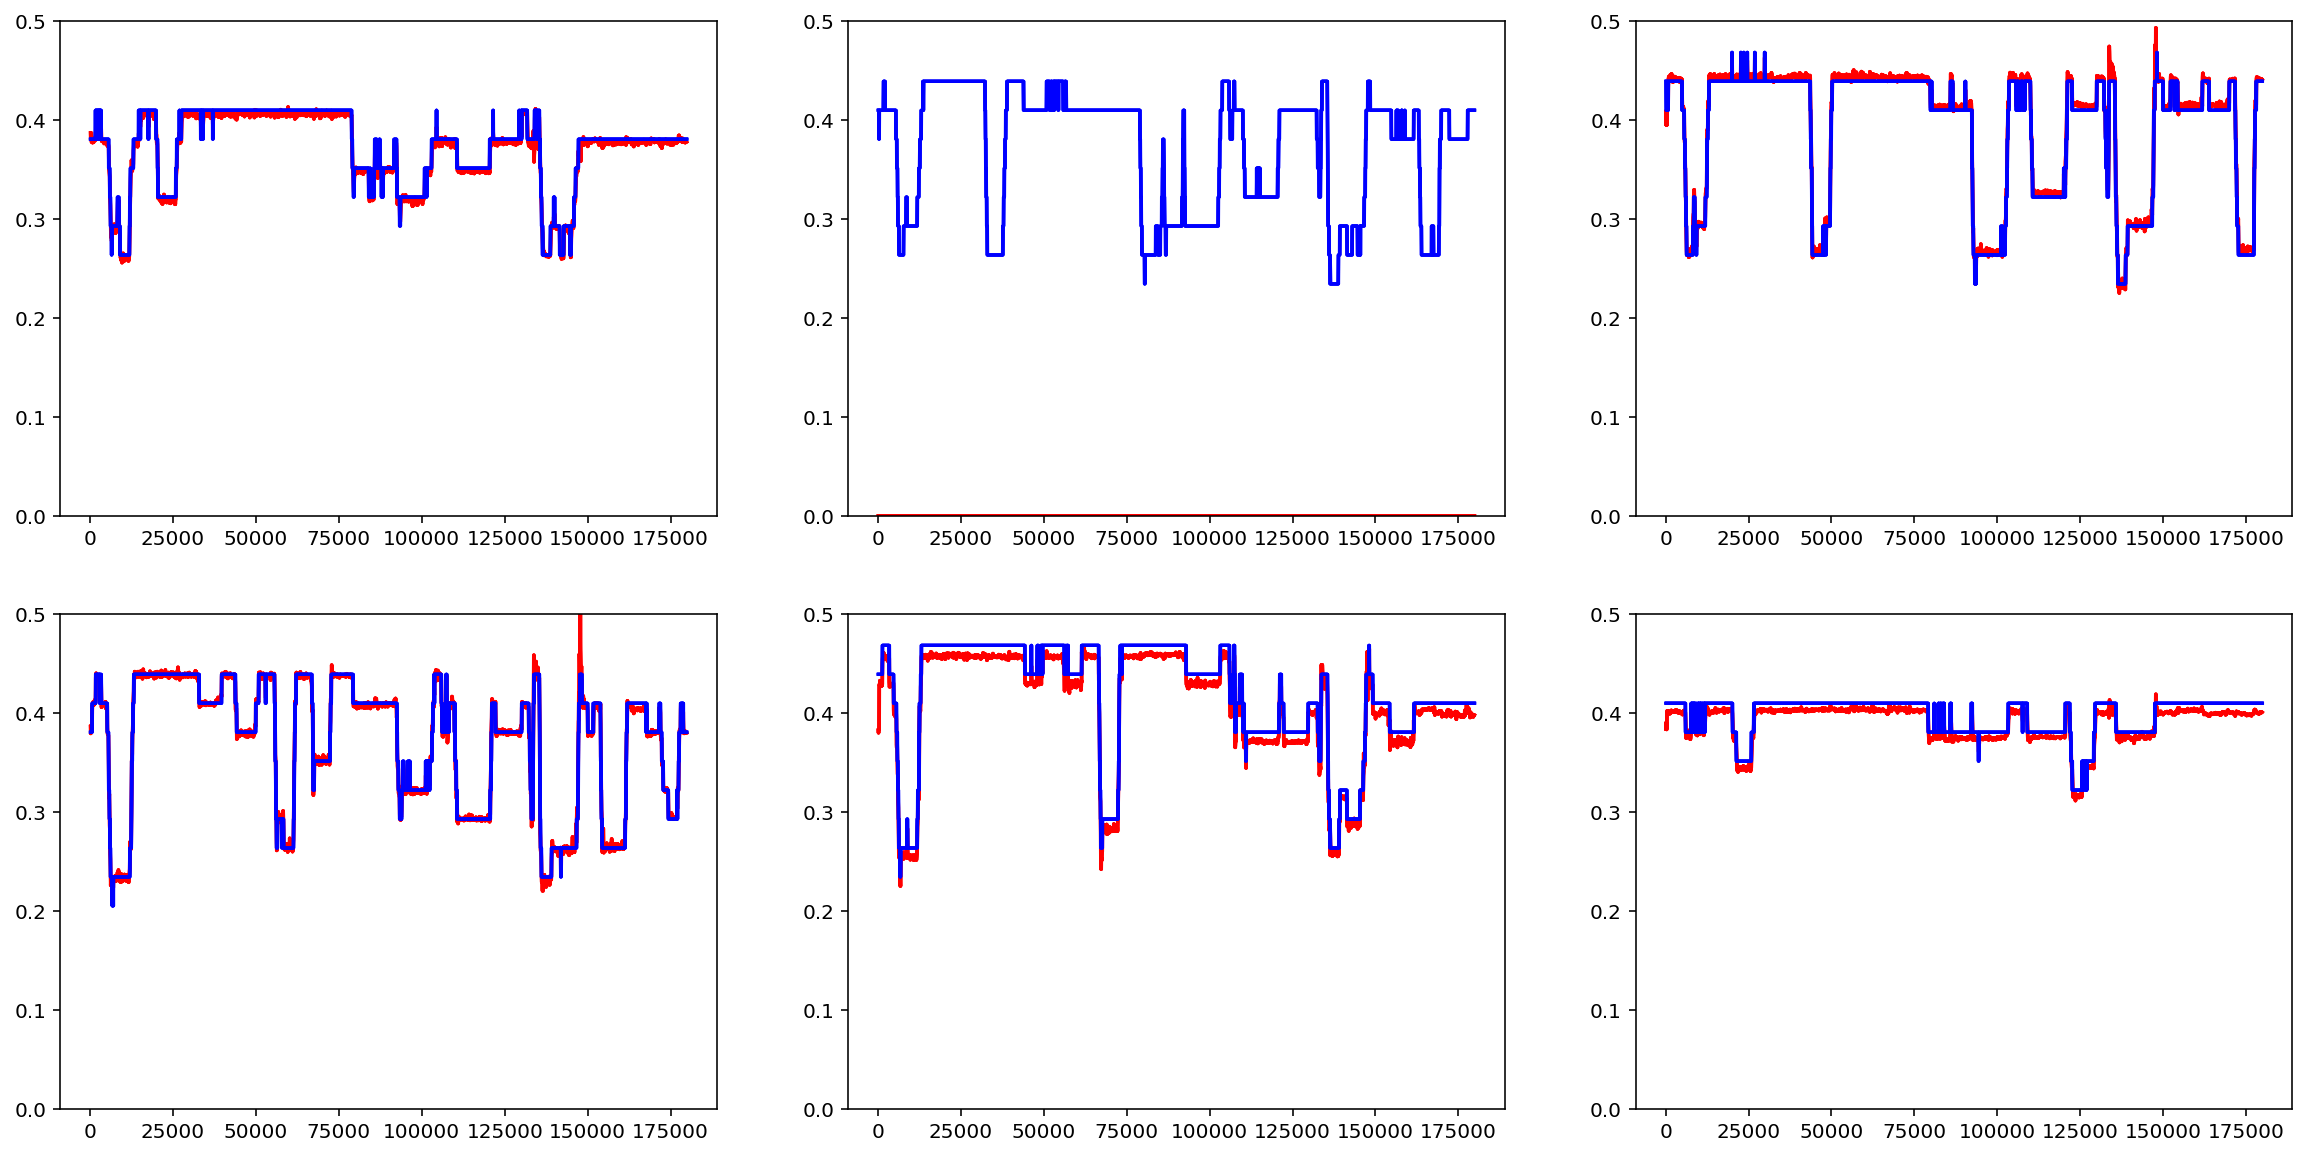

In [96]:
prediction = np.asarray(prediction)
        
p = Plotter(prediction, trainer.label, trainer.index, 6)
p.plot_comparison()